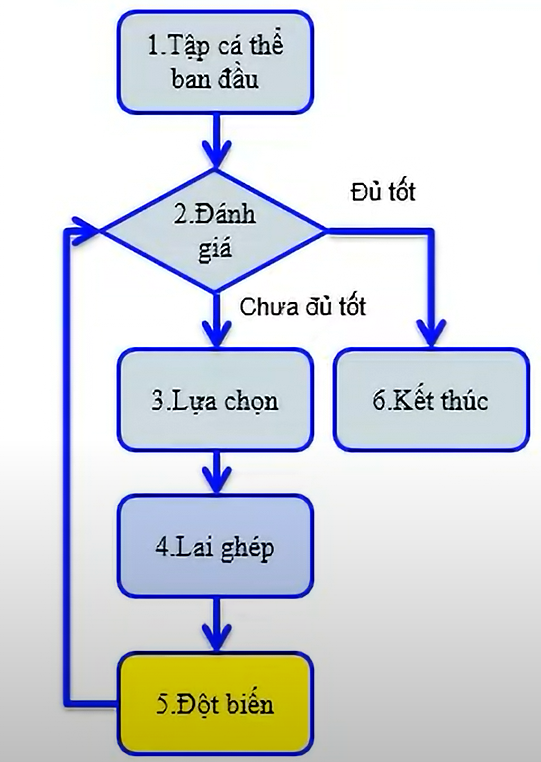

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import copy

### Cost function

In [115]:
# cost function
def sphere(x):
    ''' 
    Đây là problem chúng ta sẽ giải quyết tối ưu hóa,
    => mỗi nhiễm sắc thể của bố mẹ có một chi phí được tính từ cost function (hàm chi phí) này
    '''
    return sum(x**2)

### problem & Parameters

In [116]:
# Problem definition
costfunc = sphere
num_var = 5       # number of decicion variables (số chiều)
varmin = -10      # lower bound
varmax = 10       # upper bound

# GA Parameters
maxit = 501  # number of iterations (Số lượng thế hệ tối đa mà thuật toán di truyền sẽ chạy.)
npop = 20    # initial population size (Số lượng cá thể trong quần thể)
beta = 1    # Tham số beta cho việc tính toán xác suất đột biến.
prop_children = 1  # proportion of children to population (tỉ lệ trẻ em / dân số)
num_children = int(np.round(prop_children * npop/2)*2) # an even number: (Số lượng cá thể con được tạo ra trong mỗi thế hệ)
mu = 0.2     # mutation rate 20%, 205 of 5 is 1, mutating 1 gene 9 (Giá trị trung bình cho quá trình tái sản phẩm (crossover))
sigma = 0.1     # Độ biến đổi (mutation rate) cho quá trình đột biến (mutation).

**Lưu các cá thể**

In [117]:
population = {}

**Tạo nhiễm sắc thể và cost cho từng cá thể**

In [118]:
for i in range(npop):
    population[i] = {'position': None, 'cost': None}
population

{0: {'position': None, 'cost': None},
 1: {'position': None, 'cost': None},
 2: {'position': None, 'cost': None},
 3: {'position': None, 'cost': None},
 4: {'position': None, 'cost': None},
 5: {'position': None, 'cost': None},
 6: {'position': None, 'cost': None},
 7: {'position': None, 'cost': None},
 8: {'position': None, 'cost': None},
 9: {'position': None, 'cost': None},
 10: {'position': None, 'cost': None},
 11: {'position': None, 'cost': None},
 12: {'position': None, 'cost': None},
 13: {'position': None, 'cost': None},
 14: {'position': None, 'cost': None},
 15: {'position': None, 'cost': None},
 16: {'position': None, 'cost': None},
 17: {'position': None, 'cost': None},
 18: {'position': None, 'cost': None},
 19: {'position': None, 'cost': None}}

 **Biến Lưu giải pháp tốt nhất**

In [119]:
bestsol = copy.deepcopy(population)
bestsol_cost = np.inf
print(bestsol, "\n\nCost:", bestsol_cost)

{0: {'position': None, 'cost': None}, 1: {'position': None, 'cost': None}, 2: {'position': None, 'cost': None}, 3: {'position': None, 'cost': None}, 4: {'position': None, 'cost': None}, 5: {'position': None, 'cost': None}, 6: {'position': None, 'cost': None}, 7: {'position': None, 'cost': None}, 8: {'position': None, 'cost': None}, 9: {'position': None, 'cost': None}, 10: {'position': None, 'cost': None}, 11: {'position': None, 'cost': None}, 12: {'position': None, 'cost': None}, 13: {'position': None, 'cost': None}, 14: {'position': None, 'cost': None}, 15: {'position': None, 'cost': None}, 16: {'position': None, 'cost': None}, 17: {'position': None, 'cost': None}, 18: {'position': None, 'cost': None}, 19: {'position': None, 'cost': None}} 

Cost: inf


**Khởi tạo population (dân số) thế hệ một bằng cách khởi tạo ngẫu nhiên các nhiễm sắc thể và tính chi phí**

In [120]:
for i in range(npop):
    population[i]['position'] = np.random.uniform(varmin, varmax, num_var)
    population[i]['cost'] = costfunc(population[i]['position'])
    if population[i]['cost'] < bestsol_cost:
        bestsol = copy.deepcopy(population[i]) 
print(population[0])

{'position': array([-9.08185949, -4.7294724 ,  2.53936375,  3.30048652,  9.34116077]), 'cost': 209.4469449319174}


**Best cost of each generation/iteration**

In [121]:
bestcost = np.empty(maxit)
bestcost

array([-1.40684794e+306,  9.81090961e-309, -4.36506454e-001,
       -4.44289927e-001, -4.59636663e-001, -4.64040770e-001,
       -4.65293784e-001, -4.66930379e-001, -4.02806414e-001,
       -4.66942592e-001, -4.71401392e-001, -4.72583426e-001,
       -4.73461582e-001, -4.77312794e-001, -4.80139758e-001,
       -4.80913587e-001, -4.85927900e-001, -4.87961440e-001,
       -4.91183466e-001, -4.92344827e-001, -4.56324461e-001,
       -4.92786976e-001, -4.96006248e-001, -5.02665857e-001,
       -5.02748526e-001, -5.04042182e-001, -5.05952272e-001,
       -5.06340316e-001, -5.06390433e-001, -5.08074030e-001,
       -5.08753891e-001, -5.14182435e-001, -5.14709487e-001,
       -5.14758186e-001, -5.17553799e-001, -5.17632177e-001,
       -5.24196724e-001, -5.25954779e-001, -5.28773335e-001,
       -5.30337178e-001, -5.31619174e-001, -5.33531229e-001,
       -5.33721038e-001, -5.35821213e-001, -5.36643989e-001,
       -5.36643989e-001, -5.36643989e-001, -5.36643989e-001,
       -5.36643989e-001,

In [122]:
def roulette_wheel_selection(p):
  ''' Roulette Wheel Selection is a method of parent 
  selection for breeding. We take the cummulative sum of probabilities
  and select the first parent whose cummulative sum is greater than
  random number'''

  c = np.cumsum(p)
  r = sum(p) * np.random.rand()
  ind = np.argwhere(r <= c)
  
  return ind[0][0]

In [123]:
def crossover(p1, p2):
  ''' Performing uniform crossover. Alpha is the flag
  that determines which gene of each chromosome is choosen
  to be inherited by the offspring. Maultiply the alpha value
  with each gene of every chromosome of both the parents and
  then add the resultant value to get child chromosome'''
  
  c1 = copy.deepcopy(p1)
  c2 = copy.deepcopy(p2)

  # Uniform crossover
  alpha = np.random.uniform(0, 1, *(c1['position'].shape))
  c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
  c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position']

  return c1, c2

In [124]:
def mutate(c, mu, sigma):
  '''
  c: child chromosome 
  mu: mutation rate. % of gene to be modified
  sigma: step size of mutation'''

  y = copy.deepcopy(c)
  flag = np.random.rand(*(c['position'].shape)) <= mu  # array of True and Flase, indicating at which position to perform mutation
  ind = np.argwhere(flag)
  y['position'][ind] += sigma * np.random.randn(*ind.shape)
  
  return y

In [125]:
def bounds(c, varmin, varmax):
  ''' Defines the upper and lower bound of gene value'''
  
  c['position'] = np.maximum(c['position'], varmin)
  c['position'] = np.minimum(c['position'], varmax)

In [126]:
def sort(arr):
  ''' Bubble sorting the population + offsoring
  in every iteration to get best fit individuals at top'''
  
  n = len(arr) 
  
  for i in range(n-1): 
  
    for j in range(0, n-i-1):  
            if arr[j]['cost'] > arr[j+1]['cost'] : 
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [127]:
# Main loop
for it in range(maxit):

    # Calculating probability for roulette wheel selectionn (Tính xác suất lựa chọn bánh xe roulette)
    costs = []

    # Lưu danh sách tất cả chi phí cho dân số
    for i in range(len(population)):
        costs.append(population[i]['cost'])

    costs = np.array(costs)

    # avg_cost: Lấy giá trị trung bình của các chi phí
    avg_cost = np.mean(costs)

    if avg_cost != 0:
        costs = costs/avg_cost

    probs = np.exp(-beta*costs)  # Tính xác suất
#     print(f"{it}:{probs}")

    # Duyệt for số lượng cá thể được tạo ra // 2
    for _ in range(num_children//2):   # we will be having two off springs for each crossover 
                                         # hence divide number of children by 2
        '''  1. Thuật toán Random Selection
        -> (chọn 2 bố mẹ ngẫu nhiên đến kết hợp)
        -> (Xáo trộn 20 cá thể bố mẹ và...)
        -> (chọn hai mảng đầu tiên được xáo trộn làm bố mẹ của chúng ta để giao phối)
        '''
#         q = np.random.permutation(npop)
#         p1 = population[q[0]]
#         p2 = population[q[1]]

       


        ''' 2. Thuật toán: Roulette wheel selection '''
#         p1 = population[roulette_wheel_selection(probs)]
#         p2 = population[roulette_wheel_selection(probs)]

        # crossover two parents
        c1, c2 = crossover(p1, p2)

        # Perform mutation
        c1 = mutate(c1, mu, sigma)
        c2 = mutate(c2, mu, sigma)

        # Apply bounds
        bounds(c1, varmin, varmax)
        bounds(c2, varmin, varmax)

        # Evaluate first off spring
        c1['cost'] = costfunc(c1['position'])                                     # calculate cost function of child 1

        if type(bestsol_cost) == float:
            if c1['cost'] < bestsol_cost:                                           # replacing best solution in every generation/iteration
                bestsol_cost = copy.deepcopy(c1)
        else:
            if c1['cost'] < bestsol_cost['cost']:                                   # replacing best solution in every generation/iteration
                bestsol_cost = copy.deepcopy(c1)


        # Evaluate second off spring
        if c2['cost'] < bestsol_cost['cost']:                                     # replacing best solution in every generation/iteration
            bestsol_cost = copy.deepcopy(c2)

    # Merge, Sort and Select
    population[len(population)] = c1
    population[len(population)] = c2

    population = sort(population)

    # Store best cost
    bestcost[it] = bestsol_cost['cost']

    # Show generation information
    print('Iteration {}: Best Cost = {}'. format(it, bestcost[it]))


out = population
Bestsol = bestsol
bestcost = bestcost
#     return (out, Bestsol, bestcost)

print(Bestsol)

Iteration 0: Best Cost = 5.281744444662234
Iteration 1: Best Cost = 5.281744444662234
Iteration 2: Best Cost = 4.89471289872094
Iteration 3: Best Cost = 4.5478545463001065
Iteration 4: Best Cost = 4.5478545463001065
Iteration 5: Best Cost = 4.5478545463001065
Iteration 6: Best Cost = 4.5478545463001065
Iteration 7: Best Cost = 4.5478545463001065
Iteration 8: Best Cost = 4.5478545463001065
Iteration 9: Best Cost = 4.5478545463001065
Iteration 10: Best Cost = 4.5478545463001065
Iteration 11: Best Cost = 4.5478545463001065
Iteration 12: Best Cost = 4.5478545463001065
Iteration 13: Best Cost = 4.5478545463001065
Iteration 14: Best Cost = 4.5478545463001065
Iteration 15: Best Cost = 4.5478545463001065
Iteration 16: Best Cost = 4.5478545463001065
Iteration 17: Best Cost = 4.5478545463001065
Iteration 18: Best Cost = 4.5478545463001065
Iteration 19: Best Cost = 4.5478545463001065
Iteration 20: Best Cost = 4.5478545463001065
Iteration 21: Best Cost = 4.47266526389668
Iteration 22: Best Cost = 

Iteration 214: Best Cost = 4.245489495490725
Iteration 215: Best Cost = 4.245489495490725
Iteration 216: Best Cost = 4.245489495490725
Iteration 217: Best Cost = 4.245489495490725
Iteration 218: Best Cost = 4.245489495490725
Iteration 219: Best Cost = 4.245489495490725
Iteration 220: Best Cost = 4.245489495490725
Iteration 221: Best Cost = 4.245489495490725
Iteration 222: Best Cost = 4.245489495490725
Iteration 223: Best Cost = 4.2101181117255475
Iteration 224: Best Cost = 4.2101181117255475
Iteration 225: Best Cost = 4.2101181117255475
Iteration 226: Best Cost = 4.2101181117255475
Iteration 227: Best Cost = 4.2101181117255475
Iteration 228: Best Cost = 4.2101181117255475
Iteration 229: Best Cost = 4.2101181117255475
Iteration 230: Best Cost = 4.2101181117255475
Iteration 231: Best Cost = 4.2101181117255475
Iteration 232: Best Cost = 4.2101181117255475
Iteration 233: Best Cost = 4.2101181117255475
Iteration 234: Best Cost = 4.2101181117255475
Iteration 235: Best Cost = 4.21011811172554

Iteration 402: Best Cost = 4.2101181117255475
Iteration 403: Best Cost = 4.2101181117255475
Iteration 404: Best Cost = 4.2101181117255475
Iteration 405: Best Cost = 4.2101181117255475
Iteration 406: Best Cost = 4.2101181117255475
Iteration 407: Best Cost = 4.2101181117255475
Iteration 408: Best Cost = 4.2101181117255475
Iteration 409: Best Cost = 4.2101181117255475
Iteration 410: Best Cost = 4.2101181117255475
Iteration 411: Best Cost = 4.2101181117255475
Iteration 412: Best Cost = 4.2101181117255475
Iteration 413: Best Cost = 4.2101181117255475
Iteration 414: Best Cost = 4.2101181117255475
Iteration 415: Best Cost = 4.2101181117255475
Iteration 416: Best Cost = 4.2101181117255475
Iteration 417: Best Cost = 4.2101181117255475
Iteration 418: Best Cost = 4.2101181117255475
Iteration 419: Best Cost = 4.2101181117255475
Iteration 420: Best Cost = 4.2101181117255475
Iteration 421: Best Cost = 4.2101181117255475
Iteration 422: Best Cost = 4.2101181117255475
Iteration 423: Best Cost = 4.21011

<function matplotlib.pyplot.show(close=None, block=None)>

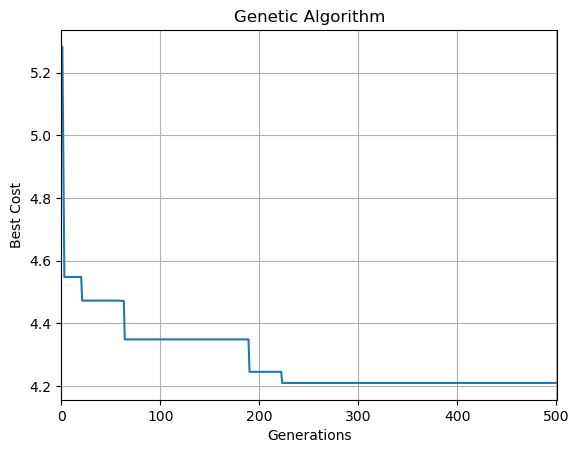

In [129]:
plt.plot(bestcost)
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show

### bài cái túi

In [ ]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt
item_number = np.arange(1,11)
weight = np.random.randint(1, 15, size = 10)
value = np.random.randint(10, 750, size = 10)
knapsack_threshold = 35    #Maximum weight that the bag of thief can hold 
print('The list is as follows:')
print('Item No.   Weight   Value')
for i in range(item_number.shape[0]):
    print('{0}          {1}         {2}\n'.format(item_number[i], weight[i], value[i]))

In [ ]:
solutions_per_pop = 8
pop_size = (solutions_per_pop, item_number.shape[0])
print('Population size = {}'.format(pop_size))
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
num_generations = 50
print('Initial population: \n{}'.format(initial_population))

In [ ]:
def cal_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)     

In [ ]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents

In [ ]:
def crossover(parents, num_offsprings):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = 0.8
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings    

In [ ]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.4
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants   

In [ ]:
def optimize(weight, value, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

In [ ]:
parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, knapsack_threshold)
print('The optimized parameters for the given inputs are: \n{}'.format(parameters))
selected_items = item_number * parameters
print('\nSelected items that will maximize the knapsack without breaking it:')
for i in range(selected_items.shape[1]):
  if selected_items[0][i] != 0:
     print('{}\n'.format(selected_items[0][i]))

In [ ]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)